<a href="https://colab.research.google.com/github/theTURYA/deep-learning/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

There are many definition for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


# Creating data to view and fit

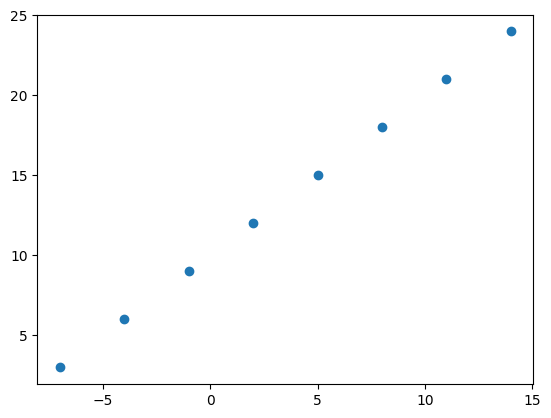

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0 ])

# Visualize
plt.scatter(X,y)

In [3]:
y == X+ 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Input and Output Shapes

In [4]:
# Create a demo tensor for our housing price prediction problem

house_info = tf.constant(["bedroom", "bathroom","garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
X[0], y[0]

(-7.0, 3.0)

In [6]:
X[1], y[1]

(-4.0, 6.0)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
X[0].ndim

0

In [9]:
X[0], y[0]

(-7.0, 3.0)

In [10]:
#Turn our numpy array to tensors
X = tf.constant(X)
y = tf.constant(y)
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

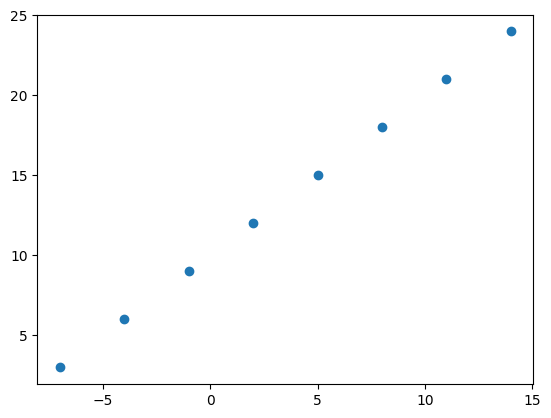

In [12]:
plt.scatter(X,y)

# Steps in modelling with Tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model)
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels)

In [13]:
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8,input_shape=(16,)))
# model.add(tf.keras.layers.Dense(4))


# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(8, input_shape=(16,)))
# ...

# model = tf.kears.Sequential()
# model.add(tf.keras.layers.Dense(1))

In [14]:
# Set a random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss = tf.keras.losses.mae,   # mae : mean absolute error
              optimizer = tf.keras.optimizers.SGD(),   # SGD : stochastic gradient descent
              metrics = ["mae"])


# 3. Fit the model

model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 13.0587 - mae: 13.0587
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 12.9262 - mae: 12.9262
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step - loss: 12.7937 - mae: 12.7937
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step - loss: 12.6612 - mae: 12.6612
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - loss: 12.5287 - mae: 12.5287


In [15]:
# Check out X and y
X,y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [16]:
y_pred = model.predict(tf.constant([17.0]))  # Convert the list to a tensor
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


array([[5.1685977]], dtype=float32)

# Improve our Model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (all called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3.**Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [17]:
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
# Compile the model
model.compile(loss=tf.keras.losses.mae, optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 10.5967 - mae: 10.5967
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 10.4642 - mae: 10.4642
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 10.3317 - mae: 10.3317
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - loss: 10.1992 - mae: 10.1992
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 10.0667 - mae: 10.0667
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 9.9342 - mae: 9.9342
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step - loss: 9.8017 - mae: 9.8017
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.6692 - mae: 9.6692
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 9.5367 - mae: 9.5367
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 9.4042 - mae: 9.4042
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 9.2717 - mae: 9.2717
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 9.1392 - mae: 9.1392
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [18]:
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


array([[29.789267]], dtype=float32)

### Let's see how we improve our model once again

1. Create the model (this time with an extra hidden layer with 100 hidden units)
2.

In [19]:
# Let's see how we improve our model once again

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
     tf.keras.layers.Dense(50, activation = "relu"),
     tf.keras.layers.Dense(1),
 ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.SGD(),
             metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 564ms/step - loss: 14.8424 - mae: 14.8424
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 14.3902 - mae: 14.3902
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 13.9545 - mae: 13.9545
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 13.5234 - mae: 13.5234
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 13.0924 - mae: 13.0924
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 12.6587 - mae: 12.6587
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 12.2193 - mae: 12.2193
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 11.7689 - mae: 11.7689
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 11.3016 - mae: 11.3016
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 10.8155 - mae: 10.8155
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 10.3068 - mae: 10.3068
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 9.7712 - mae: 9.7712
Epoch 13/100
1/1 ━━━━━━━━━

In [20]:
model.predict(tf.constant([17.0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[31.10791]], dtype=float32)

In [21]:
# Let's see how we improve our model once again

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
     tf.keras.layers.Dense(50, activation = None),
     tf.keras.layers.Dense(1),
 ])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
             metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)
model.predict(tf.constant([17.0]))

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 913ms/step - loss: 12.6153 - mae: 12.6153
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 11.9298 - mae: 11.9298
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 11.2414 - mae: 11.2414
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 10.5485 - mae: 10.5485
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 9.8493 - mae: 9.8493
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 9.1424 - mae: 9.1424
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 8.4259 - mae: 8.4259
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 7.6973 - mae: 7.6973
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 6.9541 - mae: 6.9541
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 6.7826 - mae: 6.7826
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 7.1610 - mae: 7.1610
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 7.4333 - mae: 7.4333
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s

array([[26.731009]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when a building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it....
```

When it comes to evaluation.... there are 3 words you shuld memorize:
> "Visualize, visualize, visualize"

It's a good idea to visualize:
 * The data : what data are we working with? What does it look lke?
 * The model itself : what does our model look like?
 * The training of a model : how does a model perform while it learns?
 * The prediction of the model : how do the predictions of a model line up against the ground truth (the oroginal labels?)


In [22]:
# make a dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
# Make labels for the dataset
Y = X+ 10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

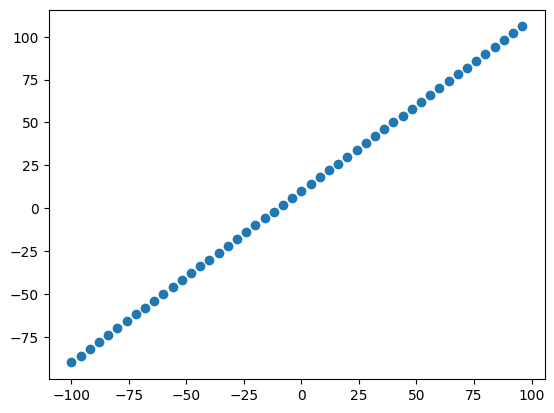

In [24]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X,Y)

### The 3 sets...

* **Training set** - the model learns from the data, which is typically 70-80% of the total data you have availbale.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of teh data availbal.
* **Test set** - the model gets evaluated on this data to test what is has learned, this set is typically 10-15% of the total data is availbale.

In [25]:
# Check the length of how many samples we have
len(X)

50

In [26]:
# Spilt the data into train and test sets
X_train = X[:40] # first 40 are training samples (80% of te data)
Y_train = Y[:40]
X_test = X[40:]  # last 10 are testing samples(20% of te data)
Y_test = Y[40:]
len(X_train), len(X_test), len(Y_train), len(Y_test)

(40, 10, 40, 10)

### Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

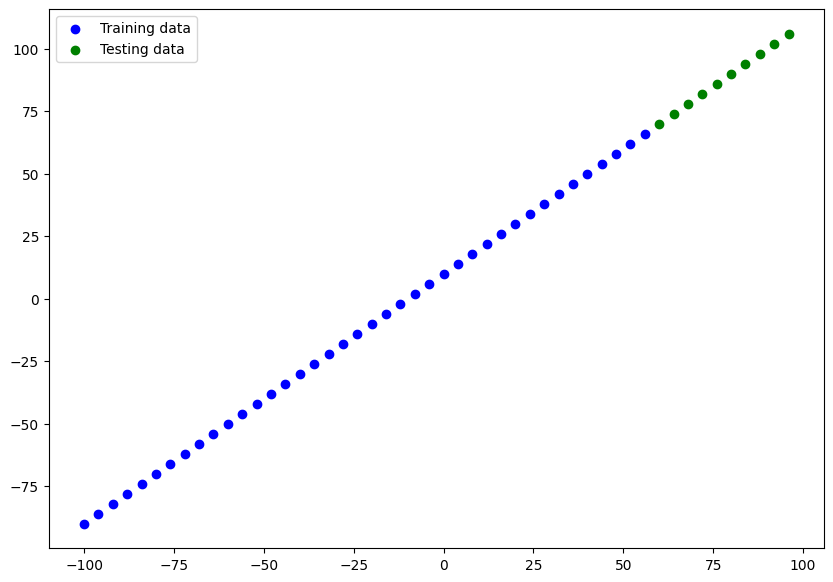

In [27]:
plt.figure(figsize = (10,7))
# Plot training data in blue
plt.scatter(X_train, Y_train, c = 'b', label = 'Training data') # Our model will learn on this
# Plot test data in blue
plt.scatter(X_test, Y_test, c = 'g', label = 'Testing data') # want our model to able to predict this (given X, what's Y?)
# Show a legend
plt.legend();

In [28]:
# Let's have a look at how to build aneural network for our data

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])
model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)
# model.fit(X_train, Y_train, epochs = 100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 72.1339 - mae: 72.1339  
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 37.1184 - mae: 37.1184 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.0913 - mae: 8.0913 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.8161 - mae: 9.8161 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.1995 - mae: 8.1995 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.7429 - mae: 8.7429 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.6097 - mae: 8.6097 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.3777 - mae: 8.3777 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9.1204 - mae: 9.1204 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.1923 - mae: 8.1923 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.8595 - mae: 8.8595 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7.7804 - mae: 7.7804 
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms

# Visualize the model

In [29]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4 (20.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [30]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name = "input_layer"),
    tf.keras.layers.Dense(1, name= "output_layer")
], name = "model_1")

# Compile the model (same as bove)
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ["mae"])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

* Total params: n total number of parameters in the model.
*Trainable parameters: these are the parameters (patterns) the model can update as it trains.
* Non-trainable params: these parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**).



In [32]:
# Let's fit our mpdel to training data
model.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100, verbose = 0)

In [33]:
model.summary()

Model: "model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

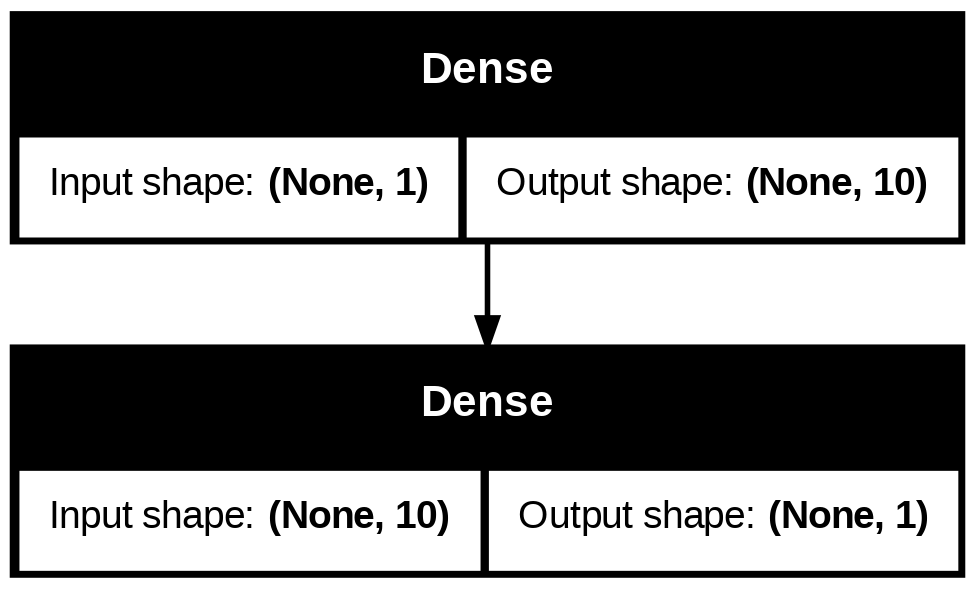

In [34]:
from tensorflow.keras.utils import plot_model
plot_model(model = model, show_shapes = True)

### Visualizing our model's predictions

To visualize predictions, it is a good idea to plot them against the ground truth labels.

Often you'll see this in the form of Y_test or Y_true versus Y_pred (ground truth versus your model's prediction)

In [35]:
# Make some predictions
Y_pred = model.predict(X_test)
Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[33.739834],
       [35.863945],
       [37.988052],
       [40.112164],
       [42.236275],
       [44.360382],
       [46.484497],
       [48.608604],
       [50.732716],
       [52.856823]], dtype=float32)

In [36]:
Y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [37]:
X_train, Y_train, X_test, Y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [38]:
# Let's create a plotting function

def plot_predictions(train_data = X_train, train_labels = Y_train,
                     test_data = X_test, test_labels = Y_test,
                     predictions = Y_pred):
## "Plots training data, test data and compares predictions to ground truth labels."

  plt.figure(figsize = (10,7))
# Plot training data in blue
  plt.scatter(train_data, train_labels, c = 'b', label = 'Training data') # Our model will learn on this
# Plot test data in blue
  plt.scatter(test_data, test_labels, c = 'g', label = 'Testing data') # want our model to able to predict this (given X, what's Y?)
# Plot model's prediction in red
  plt.scatter(test_data, predictions, c = 'r', label = 'Predictions')
# Show the legend
  plt.legend();

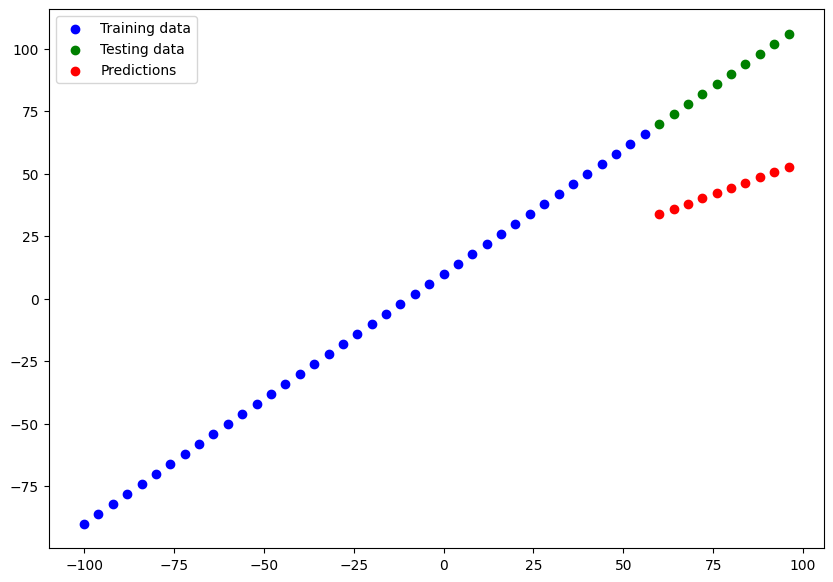

In [39]:
plot_predictions()

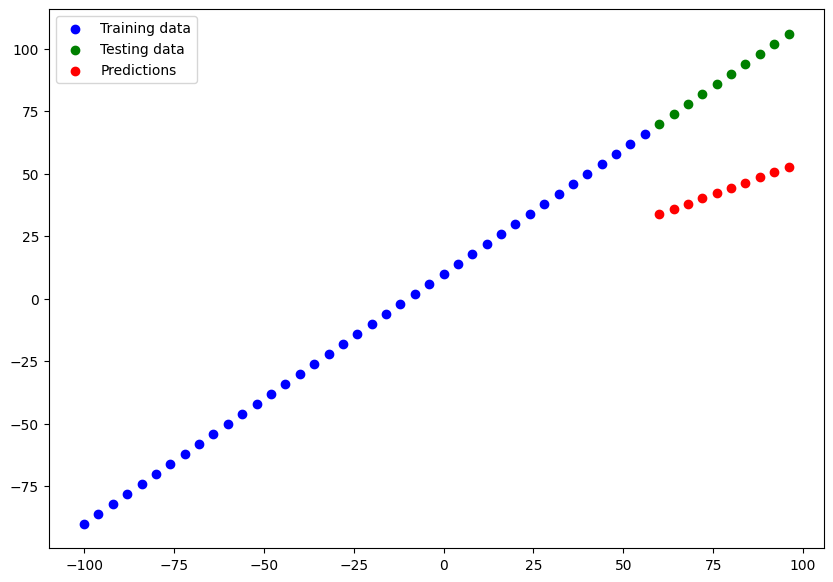

In [40]:
plot_predictions(train_data = X_train, train_labels = Y_train,
                     test_data = X_test, test_labels = Y_test,
                     predictions = Y_pred)

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on regression, two of the main metrics:

* **MAE:** mean absolute error, "on avearge, how wrong is each of my model's predictions". ``As a great starter metric for any regression problem.``
* **MSE:** mean square error, "square the average errors". ``When larger errors are more significant than smaller. ``

The another metric is : "Huber" -> Combination of MSE nad MAE , less sensitive to outliers than MSE.

In [41]:
# Evaluate the model on the test
model.evaluate(X_test, Y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step - loss: 44.7017 - mae: 44.7017


[44.7016716003418, 44.7016716003418]

In [42]:
# Calculate the mean absolute error
mae = tf.keras.losses.MAE(y_true = Y_test, y_pred = tf.constant(Y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([36.260166, 38.136055, 40.011948, 41.887836, 43.763725, 45.639618,
       47.515503, 49.391396, 51.267284, 53.143177], dtype=float32)>

In [43]:
tf.constant(Y_pred), Y_test

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[33.739834],
        [35.863945],
        [37.988052],
        [40.112164],
        [42.236275],
        [44.360382],
        [46.484497],
        [48.608604],
        [50.732716],
        [52.856823]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [44]:
tf.squeeze(Y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([33.739834, 35.863945, 37.988052, 40.112164, 42.236275, 44.360382,
       46.484497, 48.608604, 50.732716, 52.856823], dtype=float32)>

In [45]:
# Calculate the MAE
mae = tf.keras.losses.MAE(y_true = Y_test, y_pred = tf.squeeze(Y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=44.70167>

In [46]:
# Calculate the MSE
mae = tf.keras.losses.MSE(y_true = Y_test, y_pred = tf.squeeze(Y_pred))
mae



<tf.Tensor: shape=(), dtype=float32, numpy=2027.2708>

In [47]:
# Make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
  return tf.keras.losses.MAE(y_true = Y_test, y_pred = tf.squeeze(Y_pred))

def mse(y_true, y_pred):
  return tf.keras.losses.MSE(y_true = Y_test, y_pred = tf.squeeze(Y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> evaluate it...

```

1. Get more data: get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model): this might come in the form of more lavers or more hidden units in each layer.
3. Train for longer: give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layersm trained for 500 epochs.

**Build `model_1`**


In [48]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])
model_1.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])
model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 9.8000 - mae: 9.8000 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.0714 - mae: 8.0714 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 9.7884 - mae: 9.7884 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.0535 - mae: 8.0535 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 9.7768 - mae: 9.7768 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.1608 - mae: 8.1608 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.7038 - mae: 8.7038 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8.5705 - mae: 8.5705 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 8.3390 - mae: 8.3390 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.0809 - mae: 9.0809
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.1536 - mae: 8.1536
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.8200 - mae: 8.8200  
Epoch 13/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/st

In [49]:
X_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


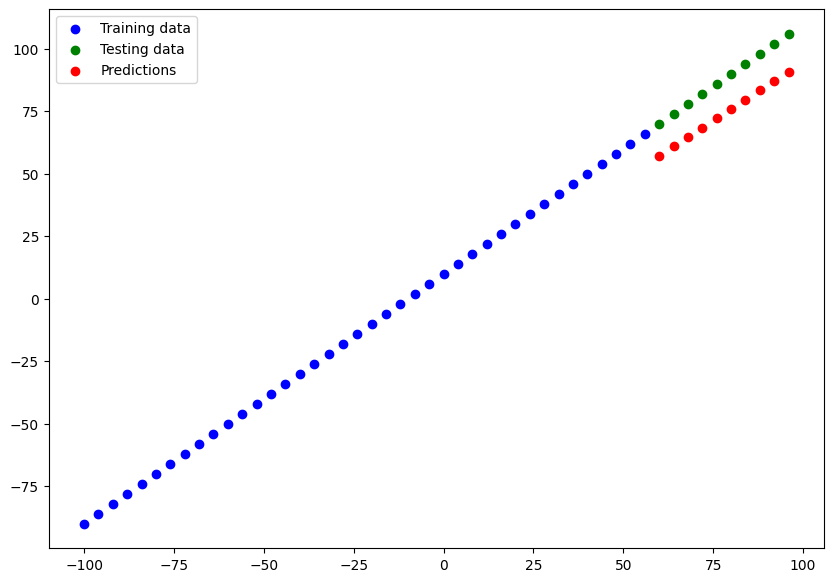

In [50]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [51]:
y_preds_1

array([[57.30334 ],
       [61.028854],
       [64.75437 ],
       [68.47988 ],
       [72.2054  ],
       [75.93091 ],
       [79.656425],
       [83.38194 ],
       [87.10745 ],
       [90.83297 ]], dtype=float32)

### Calculate model_1 evaluation metrics

In [52]:
mae_1 = tf.keras.losses.MAE(y_true = Y_test, y_pred = tf.squeeze(y_preds_1))
mae_1

<tf.Tensor: shape=(), dtype=float32, numpy=13.931845>

In [53]:
mse_1 = tf.keras.losses.MSE(y_true = Y_test, y_pred = tf.squeeze(y_preds_1))
mse_1

<tf.Tensor: shape=(), dtype=float32, numpy=194.7179>

**Build** `model_2`

2 layers, 100 epochs


In [54]:
tf.random.set_seed(42)
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])
model_2.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 41.5351 - mae: 41.5351 
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 31.9099 - mae: 31.9099 
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 23.3715 - mae: 23.3715 
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.4952 - mae: 19.4952 
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.5681 - mae: 17.5681 
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.7531 - mae: 16.7531 
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 16.6135 - mae: 16.6135 
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.8122 - mae: 11.8122 
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 14.7372 - mae: 14.7372 
Epoch 10/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.6877 - mae: 15.6877 
Epoch 11/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 11.8576 - mae: 11.8576 
Epoch 12/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 14.8612 - mae: 14.8612
Epoch 13/100
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


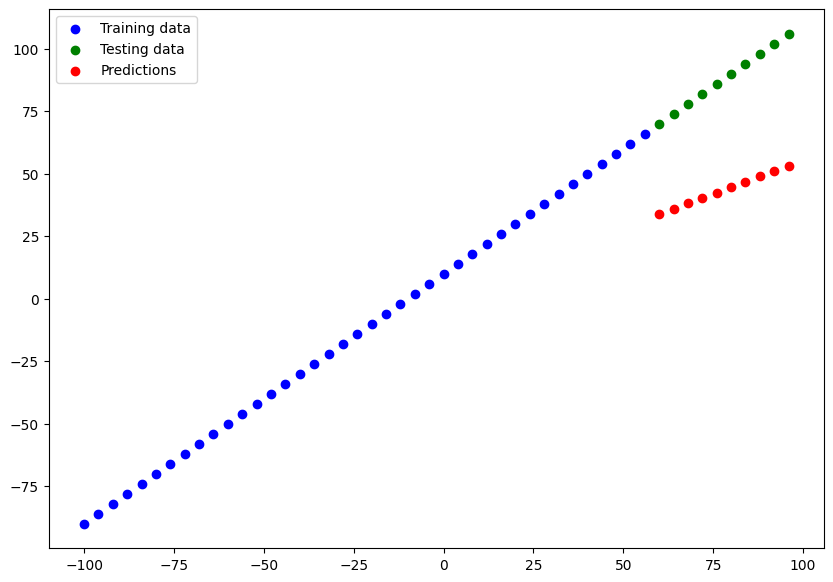

In [55]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [56]:
def mae(y_true, y_pred):
  return tf.keras.losses.MAE(y_true = Y_test, y_pred = tf.squeeze(y_preds_2))

def mse(y_true, y_pred):
  return tf.keras.losses.MSE(y_true = Y_test, y_pred = tf.squeeze(y_preds_2))

In [57]:
# Calculate model_2 evaluation metrics
mae_2 = mae(Y_test, y_preds_2)
mse_2 = mse(Y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=44.43877>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2002.9105>)

### Calculate model_2 evaluation metrics

In [58]:
mae_2 = tf.keras.losses.MAE(y_true = Y_test, y_pred = tf.squeeze(y_preds_2))
mae_2


<tf.Tensor: shape=(), dtype=float32, numpy=44.43877>

In [59]:
mse_2 = tf.keras.losses.MSE(y_true = Y_test, y_pred = tf.squeeze(y_preds_2))
mse_2

<tf.Tensor: shape=(), dtype=float32, numpy=2002.9105>

In [60]:
model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

**Build** `model_3`

2 layers, 500 epochs

In [61]:
tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["mae"])
model_3.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=500)

Epoch 1/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 57.7887 - mae: 57.7887 
Epoch 2/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 40.2285 - mae: 40.2285 
Epoch 3/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 31.8684 - mae: 31.8684 
Epoch 4/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.6878 - mae: 17.6878 
Epoch 5/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 19.9420 - mae: 19.9420 
Epoch 6/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12.5538 - mae: 12.5538 
Epoch 7/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 18.8790 - mae: 18.8790 
Epoch 8/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.7683 - mae: 13.7683 
Epoch 9/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 15.0607 - mae: 15.0607 
Epoch 10/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 15.9065 - mae: 15.9065
Epoch 11/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 11.9771 - mae: 11.9771 
Epoch 12/500
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 14.9785 - mae: 14.9785 
Epoch 13/500
2/2 ━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


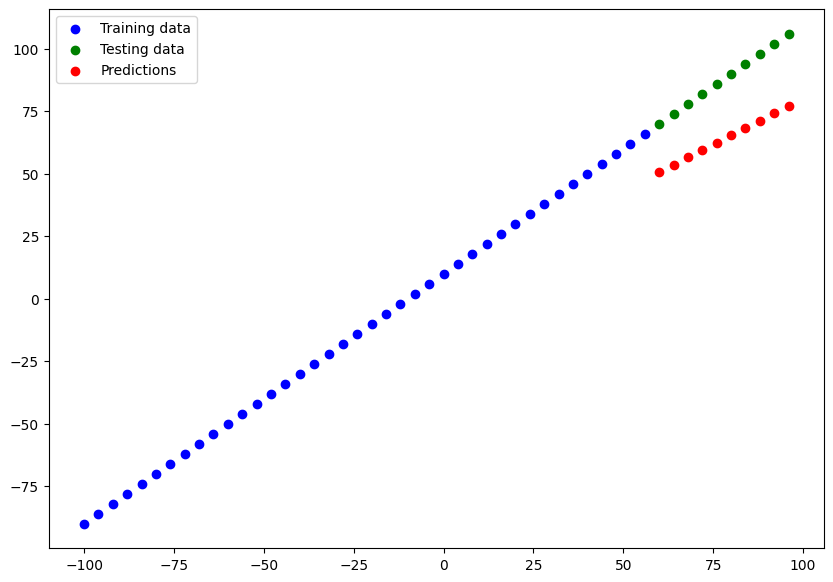

In [62]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions = y_preds_3)

### Calculate model_3 evaluation metrics

In [63]:
mae_3 = tf.keras.losses.MAE(y_true = Y_test, y_pred = tf.squeeze(y_preds_3))
mae_3


<tf.Tensor: shape=(), dtype=float32, numpy=24.045248>

In [64]:
mse_3 = tf.keras.losses.MSE(y_true = Y_test, y_pred = tf.squeeze(y_preds_3))
mse_3


<tf.Tensor: shape=(), dtype=float32, numpy=587.47723>

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [65]:
# Let's compare our model's results using a pandas DataFrame

import pandas as pd
model_results = [["model_1",mae_1.numpy(), mse_1.numpy()],
                 ["model_2",mae_2.numpy(), mse_2.numpy()],
                 ["model_3",mae_3.numpy(), mse_3.numpy()]]
all_results = pd.DataFrame(model_results, columns = ["model", "mae", "mse"])
all_results


,model,mae,mse
0,model_1,13.931845,194.717896
1,model_2,44.438770,2002.910522
2,model_3,24.045248,587.477234


Looks like `model_1` performs the best among all of the three models...

In [66]:
model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

🔑**Note:** One of our main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's moto: ``"experiment, experiment, experiment."``

## Tracking your experiments

One really good habit in machine learning modelling is to track the reasults of your experiments.

And when doing so, it can be tedious, if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resources:** As you build more models, you'll want to look into using:

* **TensorBoard:** a component of the TensorFlow library to help track modelling experiments.
* **Weights & Biases:** a tool for tracking all of kinds of machine learning experiments (plug straight into TensorBoard)



## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or mobile app.

There are two main formats we can save our model's to:
1. The SavedModel format
2. The HDF5 format

## Loading a save model

In [67]:
!mkdir saved_models

`Save model using the SaveModel format`


In [68]:
model_2.save("saved_models/best_model_SavedModel_format.keras")

In [69]:
!ls saved_models/best_model_SavedModel_format.keras

saved_models/best_model_SavedModel_format.keras


`Save model using HDF5 format`

In [70]:
model_2.save("saved_models/best_model_HDF5_format.h5")

## Loading in a save model

`Load in the SaveModel format model`

In [71]:
load_SaveModel_format = tf.keras.models.load_model("saved_models/best_model_SavedModel_format.keras")
load_SaveModel_format.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [72]:
model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [73]:
# Compare model_2 predictions with SaveModel format model prediction
model_2_preds = model_2.predict(X_test)
load_SaveModel_format_preds = load_SaveModel_format.predict(X_test)
model_2_preds == load_SaveModel_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [74]:
# Comapre the MAE of model_2_preds and loaded_Savemodel_format_preds
mae(y_true=Y_test, y_pred=model_2_preds) == mae(y_true=Y_test, y_pred=load_SaveModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [75]:
model_2_preds.squeeze()

array([33.86708 , 36.021336, 38.175594, 40.32985 , 42.4841  , 44.638355,
       46.792606, 48.94686 , 51.101116, 53.25537 ], dtype=float32)

In [76]:
load_SaveModel_format_preds.squeeze()

array([33.86708 , 36.021336, 38.175594, 40.32985 , 42.4841  , 44.638355,
       46.792606, 48.94686 , 51.101116, 53.25537 ], dtype=float32)

In [77]:
model_2_preds.squeeze() == load_SaveModel_format_preds.squeeze()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

`Load in a model using the .h5 format`

In [79]:
load_h5_format = tf.keras.models.load_model("saved_models/best_model_HDF5_format.h5")
load_h5_format.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [80]:
model_2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 100)                 │             200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [81]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
load_h5_format_preds = load_h5_format.predict(X_test)
model_2_preds == load_h5_format_preds

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you wannt tpo download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Using code. (see the cell below)
3. Save it to Google Drive by connecting Google Drive and copying in there. (see 2nd code cell below)

In [83]:
# Download a file from Google Colab
from google.colab import files
files.download("saved_models/best_model_SavedModel_format.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [84]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)

!cp /content/saved_models/best_model_HDF5_format.h5 /content/drive/MyDrive/tensorflow_course

In [85]:
!ls /content/drive/MyDrive/tensorflow_course

best_model_HDF5_format.h5


## A larger example

In [86]:
X_train, Y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)